## Task 4 - Fundamentals of Data Analysis

### Peter Finnerty

#### November 30th, 2020: 
**Simpson’s paradox** is a well-known statistical paradox
where a trend evident in a number of groups reverses when the groups are combined
into one big data set. 

* Use numpy to create four data sets, each with an x array and a corresponding y array, to demonstrate Simpson’s paradox. 

* You might create your x arrays using numpy.linspace and create the y array for each x using notation like y = a * x + b where you choose the a and b for each x , y pair to demonstrate the paradox. 

* You might see the Wikipedia page for Simpson’s paradox for inspiration.


### 4.1. Summarising Simpson's Paradox

Simpson’s Paradox occurs when trends that appear when a dataset is separated into groups reverse when the data are aggregated (towardsdatascience.com).

A simple example of how this paradox can occur is in the choosing of a restaurant based on (i) male and female reviews and (ii) all reviews combined (towardsdatascience.com).

In this example a couple that are looking for the best recommended restaurant to eat at both look up user reviews for two restaurants (Sophia's and Carlo's). However, the first person looks up the restaurant that has a higher rating from men and women separately, whilst the second person looks up the highest reviews from both combined. 

It may seem counterintuitive that looking at reviews based on gender and looking at reviews for both groups combined may produce different ratings, but if the sample sizes are different and you look at rating alone this is possible.

Look at the table below that illustrates these contradictory trends:

![](https://miro.medium.com/max/700/1*l-F5-80NqgsGiDk2I4Z0Ew.png)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import seaborn as sns
rng = np.random.default_rng(0)

### 4.3. Simple Example of Plotting Simpson's Paradox

In the cell below, 4 datasets have been created. The x values are created using Numpy's linsapce() function and the y values are created by subtracting x1 from an incrementally higher value. 

This creates 4 lines that appear to decrease in y value x increases. Their independent shape differs from the trend of the combined datasets however.

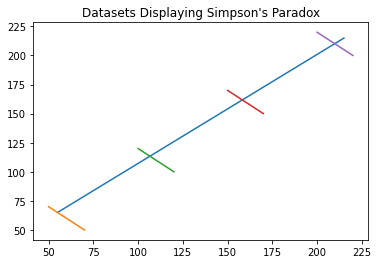

In [55]:
x1 = np.linspace(50, 70, 100)
y1 = 120 - x1

x2 = np.linspace(100, 120, 100)
y2 = 170 - x1

x3 = np.linspace(150, 170, 100)
y3 = 220 - x1

x4 = np.linspace(200, 220, 100)
y4 = 270 - x1

linex = [55, 215]
liney = [65, 215]
plt.plot(linex, liney)

plt.title("Datasets Displaying Simpson's Paradox")

plt.plot(x1, y1, x2, y2, x3, y3, x4, y4)
plt.show()


As can be seen, the 4 coloured lines each representing one of the datasets show a trend that is the reverse of the overall trend (blue line).

### 4.4. Graphing Simpson's Paradox on a Scatterplot

Scatterplots give us a better visual understanding of the spread of data. By creating a bivariate plot, we can understand in 2-dimensions how Simpson's Paradox occurs. 

Similar to the plot in the previous section, Numpy's linspace() function has been used to create even points in a given range. This creates z values, which are used as intermediate datapoints. 

We place the data created using linspace() into Numpy's random exponential() function and with this we produce datapoints in the Exponential distribution. This will provide a spread to the data across the x axis, thereby giving the datasets their individual trend, against which we will demonstate the reversed trend of the combined datasets.

The y values are calculated by taking the intermediate z values from specified points, that provide a graph that is easy to understand.

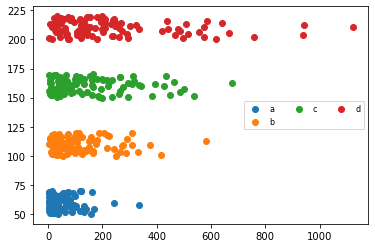

In [56]:
# Set Numpy's RNG Constructor and seed value
rng = np.random.default_rng(42)

# Create z variables using linspace to create 20 data points
# Create x variable that rearranges the z values into the exponential distribution
# Create y variables that take z from x variables

# Repeat so that 4 datasets have been created
z5 = np.linspace(50, 70, 100)
x5 = rng.exponential(z5)
y5 = 120 - z5 

z6 = np.linspace(100, 120, 100) 
x6 = rng.exponential(z6)
y6 = 170 - z5

z7 = np.linspace(150, 170, 100)
x7 = rng.exponential(z7)
y7 = 220 - z5

z8 = np.linspace(200, 220, 100)
x8 = rng.exponential(z8)
y8 = 270 - z5

# Assign each dataset to a scattplot function, subbing in x and y values
a = plt.scatter(x=x5, y=y5)
b = plt.scatter(x=x6, y=y6)
c = plt.scatter(x=x7, y=y7)
d = plt.scatter(x=x8, y=y8)



# Add a legend for clarity
plt.legend((a, b, c, d),
           ('a', 'b', 'c', 'd'),
           scatterpoints=1,
           loc='right',
           ncol=3,
           fontsize=8)


plt.show()

#### Regression Lines Displaying Simpson's Paradox

Using Seaborn's regplot() we can not add regression lines diplaying the trend for data for each of the datasets. To do this we must first places each dataset into 4 Pandas dataframes. Using the ravel() method we can combine the x and y values for each of the 4 datasets.

Additionally, we will manually add a line displaying the overall trend of the dataset.

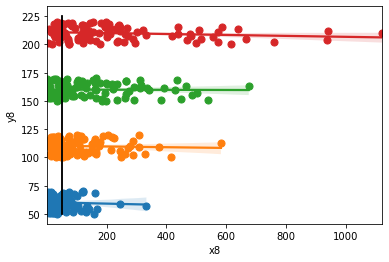

In [57]:
# Create 4 dataframes for x and y using ravel method()
df1 = pd.DataFrame( { "x5": x5.ravel(), "y5": y5.ravel() } )
df2 = pd.DataFrame( { "x6": x6.ravel(), "y6": y6.ravel()  } )
df3 = pd.DataFrame( { "x7": x7.ravel(), "y7": y7.ravel()  } )
df4 = pd.DataFrame( { "x8": x8.ravel(), "y8": y8.ravel()  } )

# Plot using regplot(), setting x_estimator to np.mean
n = sns.regplot(x="x5", y="y5", data=df1, x_estimator=np.mean)
m = sns.regplot(x="x6", y="y6", data=df2, x_estimator=np.mean)
v =sns.regplot(x="x7", y="y7", data=df3, x_estimator=np.mean)
b = sns.regplot(x="x8", y="y8", data=df4, x_estimator=np.mean)
plt.plot(line_x_all, line_y_all, color='black')

# Plot line showing concentration of points across 4 datasets
line_x_all = [50, 50]
line_y_all = [50, 225]
line_all = plt.plot(line_x_all, line_y_all, color='black')

plt.show()

In the above plot, the regression model created for each of the datasets displays a trend outward along the x axis. Conversely, the trend that is seen across the 4 datasets is a high population of data in the lower ranges of x values. As a result, I have drawn the black line across this data, to highlight how when the data is viewed altogether, Simpson's Paradox is evident.

#### Reference: https://www.clinfo.eu/simpsons-paradox/
#### Reference:https://academic.oup.com/ije/article/40/3/780/746837
#### Reference:https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20also%20goes,when%20these%20groups%20are%20combined.
#### Reference: https://www.kdnuggets.com/2020/09/simpsons-paradox.html
#### Reference: https://seaborn.pydata.org/tutorial/regression.html

---------------------